# Analyzing baby names 

Popular Baby Names by Sex and Ethnic Group. 

## Pass a URL to the pd.read_csv Method

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
url = "https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv"
bnames= pd.read_csv(url)

In [10]:
bnames.head(6)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62


## Examine the data 

In [11]:
bnames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39472 entries, 0 to 39471
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       39472 non-null  int64 
 1   Gender              39472 non-null  object
 2   Ethnicity           39472 non-null  object
 3   Child's First Name  39472 non-null  object
 4   Count               39472 non-null  int64 
 5   Rank                39472 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [12]:
bnames["Child's First Name"].nunique()

3165

### Finding out if Rank is specific to Year

##### Based on duplicate ranks per year, ethnicity, this dataset contains duplicate records

In [13]:
bnames = bnames.sort_values( by = ['Rank','Year of Birth',"Child's First Name"], ascending = True)

In [14]:
bnames.head(40)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
322,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
3180,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
15663,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
30707,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
597,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
2044,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
15939,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
29571,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
22,2011,FEMALE,HISPANIC,ISABELLA,331,1
2880,2011,FEMALE,HISPANIC,ISABELLA,331,1


In [15]:
bnamesmod = bnames.drop_duplicates(ignore_index = True)

In [16]:
bnamesmod = bnamesmod.sort_values( by = ['Rank','Year of Birth',"Child's First Name"], ascending = True)

In [17]:
bnamesmod.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
1,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
2,2011,FEMALE,HISPANIC,ISABELLA,331,1
3,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
4,2011,MALE,HISPANIC,JAYDEN,426,1
5,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1
6,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
7,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
8,2012,FEMALE,ASIAN AND PACI,CHLOE,172,1
9,2012,FEMALE,WHITE NON HISP,EMMA,228,1


## Grouping by Year, ethnicity and rank 

In [18]:
PerYear = bnamesmod.groupby(["Year of Birth","Ethnicity","Rank"])

In [19]:
PerYear["Rank"].count()

Year of Birth  Ethnicity                   Rank
2011           ASIAN AND PACIFIC ISLANDER  1        2
                                           2        2
                                           3        2
                                           4        2
                                           5        2
                                                   ..
2019           WHITE NON HISPANIC          93      12
                                           94      23
                                           95      20
                                           96      23
                                           97      23
Name: Rank, Length: 2455, dtype: int64

In [23]:
Y2011 = bnamesmod["Year of Birth"] == 2011

In [24]:
Y2011df = bnamesmod[(Y2011)]

In [25]:
Y2011dftop = Y2011df.sort_values("Rank", ascending = True).head(10)

In [26]:
Y2011dftop.head(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
1,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
2,2011,FEMALE,HISPANIC,ISABELLA,331,1
3,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
4,2011,MALE,HISPANIC,JAYDEN,426,1
5,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1
6,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
7,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
73,2011,FEMALE,WHITE NON HISPANIC,OLIVIA,213,2
72,2011,FEMALE,HISPANIC,MIA,229,2


<AxesSubplot:title={'center':'Popular Names'}, xlabel='Count', ylabel="Child's First Name">

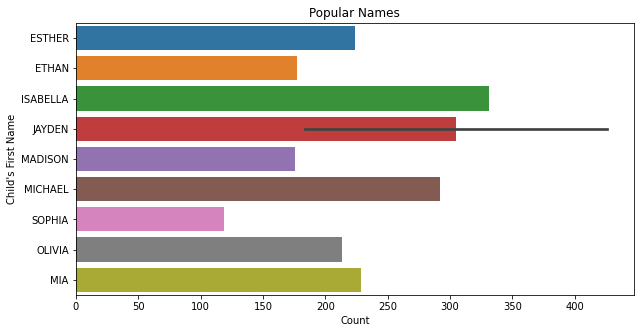

In [28]:
plt.figure(figsize = (10, 5))
plt.title("Popular Names")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="Child's First Name",x="Count", data = Y2011dftop)